In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv p-6')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [4]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

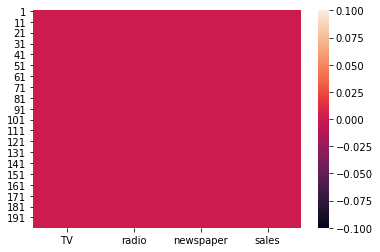

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


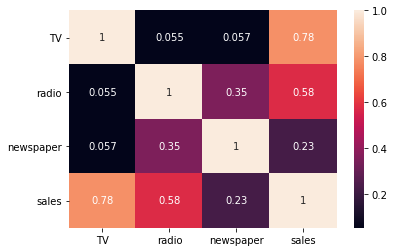

In [8]:
sns.heatmap(df.corr(),annot=True)

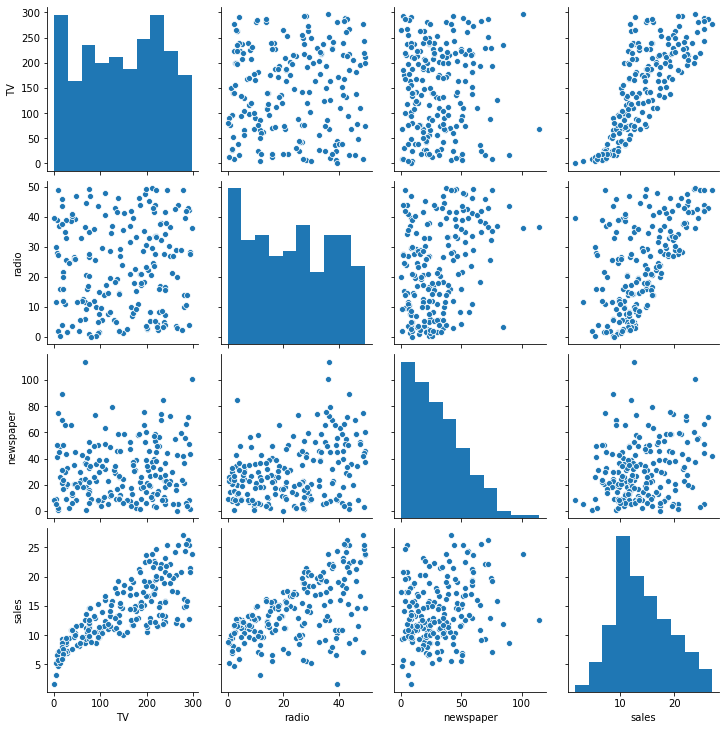

In [9]:
sns.pairplot(df)

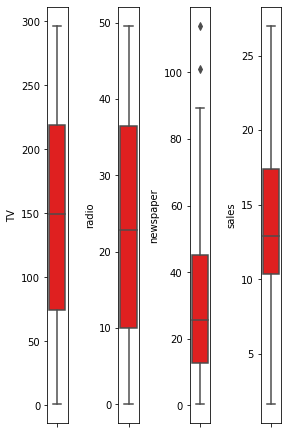

In [10]:
import matplotlib.pyplot as plt
collist=df.columns
nrow=6
ncol=12
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='v')
    plt.tight_layout()

In [11]:
x=df.iloc[:,:-1]
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
y=df.iloc[:,-1]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [13]:
x.shape

(200, 3)

In [14]:
y=y.values.reshape(-1,1)

In [15]:
y.shape

(200, 1)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
x_train,x_test,y_train,y_test

(        TV  radio  newspaper
 80   116.0    7.7       23.1
 198  177.0    9.3        6.4
 39    43.1   26.7       35.1
 25    62.3   12.6       18.3
 123  224.0    2.4       15.6
 ..     ...    ...        ...
 107   25.0   11.0       29.7
 15   204.1   32.9       46.0
 93   217.7   33.5       59.0
 180  165.6   10.0       17.6
 103  280.2   10.1       21.4
 
 [160 rows x 3 columns],
         TV  radio  newspaper
 96   163.3   31.6       52.9
 16   195.4   47.7       52.9
 31   292.9   28.3       43.2
 159   11.7   36.9       45.2
 129  220.3   49.0        3.2
 116   75.1   35.0       52.7
 70   216.8   43.9       27.2
 171   50.0   11.6       18.4
 175  222.4    3.4       13.1
 46   175.1   22.5       31.5
 67    31.5   24.6        2.2
 183   56.2    5.7       29.7
 166  234.5    3.4       84.8
 79     5.4   29.9        9.4
 187  139.5    2.1       26.6
 178  170.2    7.8       35.2
 57     7.3   28.1       41.4
 153  197.6   23.3       14.2
 83    75.3   20.3       32.5
 69   237.4  

In [18]:
len(x_train)

160

In [19]:
len(x_test)

40

In [20]:
LR=LinearRegression()

In [21]:
LR.fit(x_train,y_train)

LinearRegression()

In [22]:
LR.intercept_

array([2.97906734])

In [23]:
pred=LR.predict(x_test)
print('predicted result price=',pred)
print('actual result price=',y_test)

predicted result price= [[16.4080242 ]
 [20.88988209]
 [21.55384318]
 [10.60850256]
 [22.11237326]
 [13.10559172]
 [21.05719192]
 [ 7.46101034]
 [13.60634581]
 [15.15506967]
 [ 9.04831992]
 [ 6.65328312]
 [14.34554487]
 [ 8.90349333]
 [ 9.68959028]
 [12.16494386]
 [ 8.73628397]
 [16.26507258]
 [10.27759582]
 [18.83109103]
 [19.56036653]
 [13.25103464]
 [12.33620695]
 [21.30695132]
 [ 7.82740305]
 [ 5.80957448]
 [20.75753231]
 [11.98138077]
 [ 9.18349576]
 [ 8.5066991 ]
 [12.46646769]
 [10.00337695]
 [21.3876709 ]
 [12.24966368]
 [18.26661538]
 [20.13766267]
 [14.05514005]
 [20.85411186]
 [11.0174441 ]
 [ 4.56899622]]
actual result price= [[16.9]
 [22.4]
 [21.4]
 [ 7.3]
 [24.7]
 [12.6]
 [22.3]
 [ 8.4]
 [11.5]
 [14.9]
 [ 9.5]
 [ 8.7]
 [11.9]
 [ 5.3]
 [10.3]
 [11.7]
 [ 5.5]
 [16.6]
 [11.3]
 [18.9]
 [19.7]
 [12.5]
 [10.9]
 [22.2]
 [ 9.3]
 [ 8.1]
 [21.7]
 [13.4]
 [10.6]
 [ 5.7]
 [10.6]
 [11.3]
 [23.7]
 [ 8.7]
 [16.1]
 [20.7]
 [11.6]
 [20.8]
 [11.9]
 [ 6.9]]


In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.899438024100912
